In [1]:
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#code stopped running whenn comupter shut off, so combine both data sets here
#data1 = pd.read_csv("../uwi/data/masterdata296.csv")
#data2 = pd.read_csv("../uwi/data/masterdata296to428.csv")
reps_short_list = pd.read_csv("data/reps_short_list.csv")
vote_data_all = pd.read_csv("data/vote_data_all.csv")

In [5]:
vote_data = vote_data_all.dropna().copy()
vote_data.reset_index()
vote_data.head()

,Unnamed: 0,Unnamed: 0.1,member_id,description,position,question,result,date,congress
0,0,0,A000374,Calling on the Government of Burma to release ...,Yes,"On Motion to Suspend the Rules and Agree, as A...",Passed,2018-12-13,115
1,1,1,A000374,Agriculture and Nutrition Act of 2018,Yes,On Agreeing to the Conference Report,Passed,2018-12-12,115
3,3,3,A000374,Providing for consideration of the conference ...,Yes,On Agreeing to the Resolution,Passed,2018-12-12,115
4,4,4,A000374,Providing for consideration of the conference ...,Yes,On Ordering the Previous Question,Passed,2018-12-12,115
5,5,5,A000374,Southeast Alaska Regional Health Consortium La...,Yes,On Motion to Suspend the Rules and Pass,Passed,2018-12-11,115


In [6]:
#Create columns related to text of bill description
vote_data['lowerdesc'] = vote_data['description'].str.lower()
vote_data['AnyDrug'] = vote_data['lowerdesc'].str.contains("opioid|substance abuse|drug|addiction")
vote_data['Opioid'] = vote_data['lowerdesc'].str.contains("opioid")
vote_data['drug'] = vote_data['lowerdesc'].str.contains("drug")
vote_data['tax'] = vote_data['lowerdesc'].str.contains("tax")
vote_data['education'] = vote_data['lowerdesc'].str.contains("education|college")
vote_data['jobs'] = vote_data['lowerdesc'].str.contains("jobs|job")
vote_data['Yes'] = np.where(vote_data['position']=='Yes', 1, 0)
vote_data['No'] = np.where(vote_data['position']=='No', 1, 0)


vote_data.head()

,Unnamed: 0,Unnamed: 0.1,member_id,description,position,question,result,date,congress,lowerdesc,AnyDrug,Opioid,drug,tax,education,jobs,Yes,No
0,0,0,A000374,Calling on the Government of Burma to release ...,Yes,"On Motion to Suspend the Rules and Agree, as A...",Passed,2018-12-13,115,calling on the government of burma to release ...,False,False,False,False,False,False,1,0
1,1,1,A000374,Agriculture and Nutrition Act of 2018,Yes,On Agreeing to the Conference Report,Passed,2018-12-12,115,agriculture and nutrition act of 2018,False,False,False,False,False,False,1,0
3,3,3,A000374,Providing for consideration of the conference ...,Yes,On Agreeing to the Resolution,Passed,2018-12-12,115,providing for consideration of the conference ...,False,False,False,False,False,False,1,0
4,4,4,A000374,Providing for consideration of the conference ...,Yes,On Ordering the Previous Question,Passed,2018-12-12,115,providing for consideration of the conference ...,False,False,False,False,False,False,1,0
5,5,5,A000374,Southeast Alaska Regional Health Consortium La...,Yes,On Motion to Suspend the Rules and Pass,Passed,2018-12-11,115,southeast alaska regional health consortium la...,False,False,False,False,False,False,1,0


In [7]:
len(vote_data)

439393

In [8]:
anydrug_df = vote_data.groupby('lowerdesc').agg({'Yes' : 'sum', 'No' : 'sum'})
anydrug_df['Desc'] = anydrug_df.index
anydrug_df['AnyDrug'] = anydrug_df['Desc'].str.contains("opioid|substance abuse|drug|addiction")
anydrug_df['Opioid'] = anydrug_df['Desc'].str.contains("opioid")
anydrug_df['drug'] = anydrug_df['Desc'].str.contains("drug")
anydrug_df['health'] = anydrug_df['Desc'].str.contains("health care")
anydrug_df['act'] = anydrug_df['Desc'].str.contains("act")
anydrug_df['environment'] = anydrug_df['Desc'].str.contains("environment")

anydrug_df['tax'] = anydrug_df['Desc'].str.contains("tax|taxes")
anydrug_df['education'] = anydrug_df['Desc'].str.contains("education")
anydrug_df['jobs'] = anydrug_df['Desc'].str.contains("job|jobs|work")

anydrug_df['TotalVotes'] = anydrug_df['Yes'] + anydrug_df['No']
anydrug_df['MostVotes'] = anydrug_df[['Yes', 'No']].max(axis=1)
anydrug_df['BiPartisanScore'] = (anydrug_df['MostVotes']/anydrug_df['TotalVotes'] - 0.50)*2.0
anydrug_df.head()

,Yes,No,Desc,AnyDrug,Opioid,drug,health,act,environment,tax,education,jobs,TotalVotes,MostVotes,BiPartisanScore
lowerdesc,,,,,,,,,,,,,,,
21st century flood reform act,391,393,21st century flood reform act,False,False,False,False,True,False,False,False,False,784,393,0.002551
21st century irs act,380,3,21st century irs act,False,False,False,False,True,False,False,False,False,383,380,0.984334
a bill to authorize the national urban search and rescue response system.,331,6,a bill to authorize the national urban search ...,False,False,False,False,False,False,False,False,False,337,331,0.964392
accelerating individuals into the workforce act,345,33,accelerating individuals into the workforce act,False,False,False,False,True,False,False,False,True,378,345,0.825397
achieving a better life experience act,2,0,achieving a better life experience act,False,False,False,False,True,False,False,False,False,2,2,1.000000


In [9]:
terms = ['Opioid', 'drug', 'health', 'tax', 'education', 'jobs', 'environment']
score = []

for term in terms:
    bipartisan_df = anydrug_df.groupby(term).agg({'BiPartisanScore' : 'mean'})
    score.append(bipartisan_df['BiPartisanScore'][1])
    
    

Text(0.5,1,'Bipartisan Score by Bill Text')

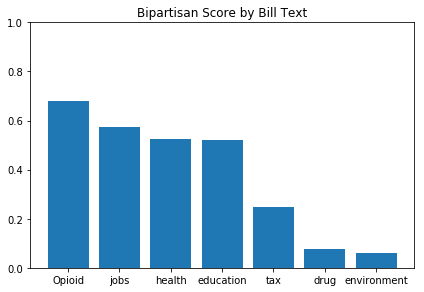

In [10]:
BipartisanScore = pd.DataFrame(list(zip(terms, score)))
BipartisanScore = BipartisanScore.sort_values(by = 1, ascending=False)
plt.bar(BipartisanScore[0], BipartisanScore[1])
plt.ylim(0,1)
plt.tight_layout()
plt.title("Bipartisan Score by Bill Text")

In [11]:
opioid = vote_data[vote_data['Opioid']]
opioidgroup = opioid.groupby('member_id').agg({'Yes' : 'sum', 'No': 'sum'})
opioidgroup['PercentYes - Opioid'] = opioidgroup['Yes'] / (opioidgroup['Yes'] + opioidgroup['No'])
opioidgroup = opioidgroup.drop('No', 1)
opioidgroup = opioidgroup.drop('Yes', 1)
opioidgroup.head()



,PercentYes - Opioid
member_id,
A000055,0.875
A000367,0.125
A000369,0.875
A000370,0.750
A000371,0.750


In [12]:
drug = vote_data[vote_data['AnyDrug']]
druggroup = drug.groupby('member_id').agg({'Yes' : 'sum', 'No': 'sum'})
druggroup['PercentYes - AnyDrug'] = druggroup['Yes'] / (druggroup['Yes'] + druggroup['No'])
druggroup = druggroup.drop('No', 1)
druggroup = druggroup.drop('Yes', 1)
druggroup.head()

,PercentYes - AnyDrug
member_id,
A000055,0.909091
A000367,0.363636
A000369,0.909091
A000370,0.545455
A000371,0.545455


In [13]:
vote_summary = pd.merge(opioidgroup, druggroup, on = "member_id", how = 'outer')
vote_summary.index.names = ['id']

vote_summary.head()

,PercentYes - Opioid,PercentYes - AnyDrug
id,,
A000055,0.875,0.909091
A000367,0.125,0.363636
A000369,0.875,0.909091
A000370,0.750,0.545455
A000371,0.750,0.545455


In [14]:
all_members_votes = pd.merge(reps_short_list, vote_summary, on = 'id', how = 'outer')
all_members_votes.head()

,Unnamed: 0,id,first_name,last_name,party,district,state,total_votes,missed_votes,seniority,missed_votes_pct,votes_with_party_pct,State_Disct,PercentYes - Opioid,PercentYes - AnyDrug
0,0,A000374,Ralph,Abraham,R,5,LA,1212.0,18.0,4,1.49,96.98,LA-5,0.875,0.909091
1,1,A000370,Alma,Adams,D,12,NC,1212.0,32.0,6,2.64,95.93,NC-12,0.750,0.545455
2,2,A000055,Robert,Aderholt,R,4,AL,1212.0,50.0,22,4.13,96.90,AL-4,0.875,0.909091
3,3,A000371,Pete,Aguilar,D,31,CA,1212.0,14.0,4,1.16,92.49,CA-31,0.750,0.545455
4,4,A000372,Rick,Allen,R,12,GA,1212.0,16.0,4,1.32,97.91,GA-12,0.875,0.909091


In [15]:
yes_votes = all_members_votes.groupby('state').agg({'PercentYes - AnyDrug' : 'mean'})

In [16]:
state = pd.read_csv("data/statedata.csv")
state.head()

,Unnamed: 0,STATEFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION
0,0,0,2014,MH_fac,10424.0,United States,US
1,1,1,2014,MH_fac,135.0,Alabama,AL
2,2,2,2014,MH_fac,80.0,Alaska,AK
3,3,4,2014,MH_fac,327.0,Arizona,AZ
4,4,5,2014,MH_fac,209.0,Arkansas,AR


In [17]:
state_death_rate = state[state['INDICATOR']== 'drugdeathrate']
state_death_rate = state_death_rate[state_death_rate['YEAR'] == 2016]

state_death_rate['state'] = state_death_rate['STATEABBREVIATION']
state_death_rate.head()

,Unnamed: 0,STATEFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,state
8652,8652,1,2016,drugdeathrate,15.5,Alabama,AL,AL
8666,8666,2,2016,drugdeathrate,17.3,Alaska,AK,AK
8680,8680,4,2016,drugdeathrate,19.9,Arizona,AZ,AZ
8694,8694,5,2016,drugdeathrate,13.4,Arkansas,AR,AR
8708,8708,6,2016,drugdeathrate,11.9,California,CA,CA


In [18]:
deaths_to_yes = pd.merge(yes_votes, state_death_rate, on = 'state', how = 'inner')
deaths_to_yes = deaths_to_yes[['PercentYes - AnyDrug', 'VALUE', 'state']]

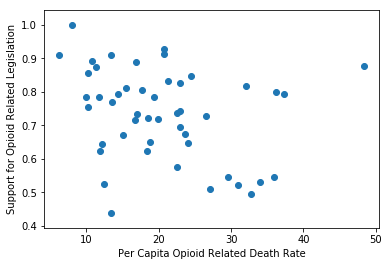

In [19]:
plt.scatter(deaths_to_yes['VALUE'], deaths_to_yes['PercentYes - AnyDrug'])
plt.xlabel('Per Capita Opioid Related Death Rate')
plt.ylabel('Support for Opioid Related Legislation')
plt.show()

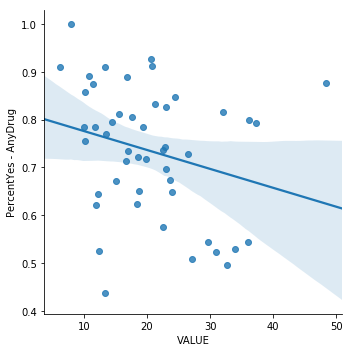

In [20]:
sns.lmplot(x = 'VALUE', y = 'PercentYes - AnyDrug', data = deaths_to_yes)

In [21]:
district = pd.read_csv("data/districtdata.csv")
district.head()

,Unnamed: 0,STATEFP,DISTRICT,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION
0,0,1,1,2014,MH_fac,11.0,Alabama,AL
1,1,1,2,2014,MH_fac,21.0,Alabama,AL
2,2,1,3,2014,MH_fac,26.0,Alabama,AL
3,3,1,4,2014,MH_fac,28.0,Alabama,AL
4,4,1,5,2014,MH_fac,16.0,Alabama,AL


In [22]:
dist_death_rate = district[district['INDICATOR']== 'drugdeathrate']
dist_death_rate = dist_death_rate[dist_death_rate['YEAR'] == 2016]
dist_death_rate['DISTRICT_Str'] = dist_death_rate['DISTRICT'].astype(str)
dist_death_rate['State_Disct'] = dist_death_rate['STATEABBREVIATION'] + '-' + dist_death_rate['DISTRICT_Str']
dist_death_rate.head()

,Unnamed: 0,STATEFP,DISTRICT,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,DISTRICT_Str,State_Disct
79833,79833,1,1,2016,drugdeathrate,12.7,Alabama,AL,1,AL-1
79847,79847,1,2,2016,drugdeathrate,0.3,Alabama,AL,2,AL-2
79861,79861,1,3,2016,drugdeathrate,6.8,Alabama,AL,3,AL-3
79875,79875,1,4,2016,drugdeathrate,11.7,Alabama,AL,4,AL-4
79889,79889,1,5,2016,drugdeathrate,11.5,Alabama,AL,5,AL-5


In [23]:
FinalData = pd.merge(all_members_votes,dist_death_rate, on = 'State_Disct')
FinalData.head()

,Unnamed: 0_x,id,first_name,last_name,party,district,state,total_votes,missed_votes,seniority,...,PercentYes - AnyDrug,Unnamed: 0_y,STATEFP,DISTRICT,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,DISTRICT_Str
0,0,A000374,Ralph,Abraham,R,5,LA,1212.0,18.0,4,...,0.909091,82325,22,5,2016,drugdeathrate,12.8,Louisiana,LA,5
1,1,A000370,Alma,Adams,D,12,NC,1212.0,32.0,6,...,0.545455,83977,37,12,2016,drugdeathrate,16.1,North Carolina,NC,12
2,2,A000055,Robert,Aderholt,R,4,AL,1212.0,50.0,22,...,0.909091,79875,1,4,2016,drugdeathrate,11.7,Alabama,AL,4
3,3,A000371,Pete,Aguilar,D,31,CA,1212.0,14.0,4,...,0.545455,80547,6,31,2016,drugdeathrate,4.4,California,CA,31
4,4,A000372,Rick,Allen,R,12,GA,1212.0,16.0,4,...,0.909091,81597,13,12,2016,drugdeathrate,6.6,Georgia,GA,12


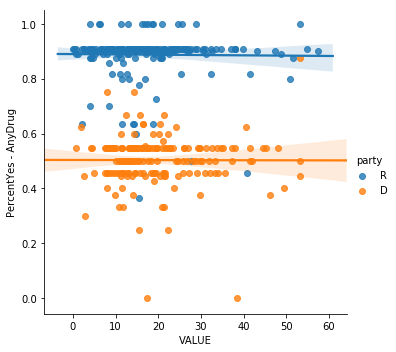

In [24]:
sns.lmplot(x = 'VALUE', y = 'PercentYes - AnyDrug',hue='party', data = FinalData)

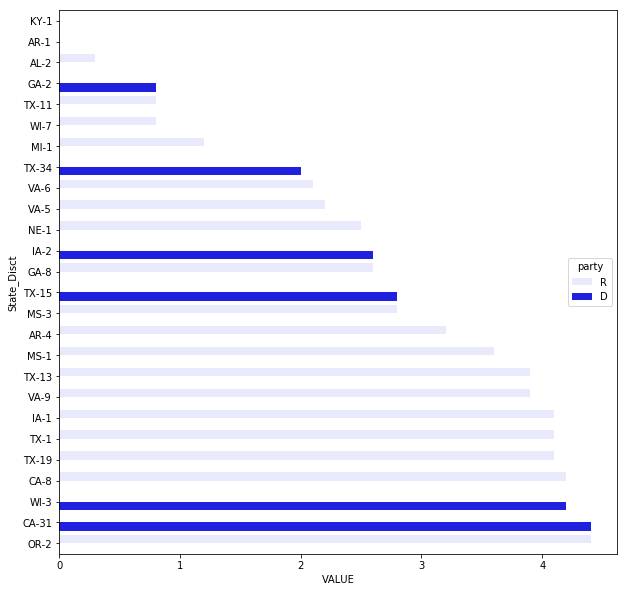

In [25]:
from matplotlib import figure
FinalDataWorst = FinalData.sort_values('VALUE', ascending=True).head(26)
sns.barplot(x = 'VALUE', y = 'State_Disct', data = FinalDataWorst, hue = 'party', color = 'b')
fig = plt.gcf()
fig.set_size_inches(10,10)
#fig.savefig('Charts/test.png')